# 1. Variable Ranking by Pearson/Linear Correlation Coefficient - LEAF Dataset

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
leaf_data = np.loadtxt('../Data_USL/leaf.csv',delimiter=',')

In [3]:
leaf_data.shape

(340, 16)

In [4]:
def linear_correlation_coeff(x,y):
    xmean = np.mean(x)
    ymean = np.mean(y)
    stdvx = np.sum((x-xmean)**2)
    stdvy = np.sum((y-ymean)**2)
    r = np.dot(x-xmean,y-ymean)/np.sqrt((stdvx*stdvy))
    return r

In [5]:
loop_end = leaf_data.shape[1]
r_lcc = []
for i in range (1,loop_end):
    r = linear_correlation_coeff(leaf_data[:,0],leaf_data[:,i])
    r_lcc.append(r)
    print('i: ', r_lcc[i-1])

i:  -0.015142016547326376
i:  0.09141460302089634
i:  0.2752101178490783
i:  0.14127524729577043
i:  0.11184290470599254
i:  0.04667831920371106
i:  -0.04976661317047229
i:  -0.04002558235513152
i:  -0.0170480505941396
i:  0.10245321896478979
i:  0.07624645270769874
i:  0.0948852053530928
i:  0.05852012269141438
i:  0.18771684999019722
i:  0.01769003965398185


In [6]:
from scipy.stats import pearsonr
loop_end = leaf_data.shape[1]
r_p = []
for i in range (1,loop_end):
    r, pval = pearsonr(leaf_data[:,0],leaf_data[:,i])
    r_p.append(r)
    print('i: ', r_p[i-1])

i:  -0.01514201654732638
i:  0.09141460302089632
i:  0.27521011784907823
i:  0.1412752472957704
i:  0.11184290470599252
i:  0.046678319203711065
i:  -0.04976661317047228
i:  -0.04002558235513153
i:  -0.017048050594139594
i:  0.10245321896478976
i:  0.07624645270769873
i:  0.09488520535309278
i:  0.05852012269141436
i:  0.18771684999019722
i:  0.017690039653981846


In [7]:
count = 0
for i in range (loop_end-1):
    b = math.isclose(r_p[i], r_lcc[i], abs_tol=0.000001)
    if b == True:
        count += 1
    
if count == loop_end - 1:    
    print("The correlation coefficients calculated by us and by Scipy are EQUAL.")
else:
    print("The correlation coefficients vs Scipy are NOT EQUAL.")

The correlation coefficients calculated by us and by Scipy are EQUAL.


In [8]:
#np.set_printoptions(precision=17,suppress=True,edgeitems=16)

corr_coeff_leaf_data = np.corrcoef(leaf_data.transpose())

print("For sake of completeness, we can also compute the correlation\
 matrix with Numpy as follows.\n")
print("The matrix shape is: ", np.corrcoef(leaf_data.transpose()).shape)
print("\nThe correlation coefficients column-wise are:\n")

for index in range(1,corr_coeff_leaf_data.shape[0]):
    print(index,corr_coeff_leaf_data[0,index]) 


# WHY TRANSPOSE?

# From the docs: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
# numpy.corrcoef(x, y=None,...)
# Parameters: x: array_like
# A 1-D or 2-D array containing multiple variables and observations.
# Each row of x represents a variable.
# Each column is a single observation of all those variables.

For sake of completeness, we can also compute the correlation matrix with Numpy as follows.

The matrix shape is:  (16, 16)

The correlation coefficients column-wise are:

1 -0.015142016547326375
2 0.09141460302089631
3 0.27521011784907823
4 0.14127524729577037
5 0.11184290470599252
6 0.046678319203710954
7 -0.04976661317047221
8 -0.040025582355131525
9 -0.017048050594139542
10 0.1024532189647896
11 0.0762464527076986
12 0.0948852053530928
13 0.058520122691414385
14 0.18771684999019725
15 0.0176900396539819


In [9]:
r_abs_lcc = np.abs(r_lcc.copy())
r_abs_lcc

array([0.01514202, 0.0914146 , 0.27521012, 0.14127525, 0.1118429 ,
       0.04667832, 0.04976661, 0.04002558, 0.01704805, 0.10245322,
       0.07624645, 0.09488521, 0.05852012, 0.18771685, 0.01769004])

In [10]:
r_ord_lcc = r_abs_lcc.copy() # copy first, since sort is in-place
r_ord_lcc.sort() 
r_ord_lcc[::-1] # reverse, for descending order

array([0.27521012, 0.18771685, 0.14127525, 0.1118429 , 0.10245322,
       0.09488521, 0.0914146 , 0.07624645, 0.05852012, 0.04976661,
       0.04667832, 0.04002558, 0.01769004, 0.01704805, 0.01514202])

In [11]:
max_indices = np.argsort(r_abs_lcc) # default is ascending max indices 
max_indices =  max_indices[::-1] # Descending
print("The features of interest are, in descending order of relevance,\n \
    COLUMNS (starting numbering from 1):\n",
      max_indices+1)

The features of interest are, in descending order of relevance,
     COLUMNS (starting numbering from 1):
 [ 3 14  4  5 10 12  2 11 13  7  6  8 15  9  1]


## The most relevant feature is the 3rd feature column (OVERALL 4th column) - ASPECT RATIO

## We find perfect match between our handwritten Pearson Correlation Coefficient and Scipy and Numpy predicted results.

# 2. Variable Ranking by Mutual Information - Congressional Voting Records Dataset

In [12]:
cv_df = pd.read_csv('../Data_USL/house-votes-84.data',header=None)
cv_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


### First, some testing, then the final version

In [13]:
print(cv_df[cv_df[16]=='?'][16])

print("Number of missing values per column:")
print("Column \t\t Number of Missing Values")
for i in range (cv_df.shape[1]):
    print(i,"\t\t\t", cv_df[cv_df[i] == '?'][i].size)
    
cv_df_mod = cv_df.replace('?',np.nan)
print(cv_df_mod.iloc[:,0:6:5])

tmp = cv_df_mod.iloc[:,0:3:2].dropna()
print(tmp)

n_cnt = tmp[tmp[2] == 'n'][2].size
y_cnt = tmp[2].size - n_cnt
total = y_cnt + n_cnt
orig_size = tmp[2].size

print(n_cnt,y_cnt,total,orig_size)

n_cnt_r = tmp[(tmp[2] == 'n') & (tmp[0] == 'republican')][0].size
n_cnt_d = tmp[(tmp[2] == 'n') & (tmp[0] == 'democrat')][0].size
y_cnt_r = tmp[(tmp[2] == 'y') & (tmp[0] == 'republican')][0].size
y_cnt_d = tmp[(tmp[2] == 'y') & (tmp[0] == 'democrat')][0].size
print("N-R: ", n_cnt_r)
print("N-D: ", n_cnt_d)
print("Total N: ", n_cnt)
print("Y-R: ", y_cnt_r)
print("Y-D: ", y_cnt_d)
print("Total Y: ", y_cnt)
print("Total ALL: ", total)

# y in formula is republican/democrat
# x are the various features
p_n_cnt_d = n_cnt_d / total
p_y_cnt_d = y_cnt_d / total
p_n_cnt_r = n_cnt_r / total
p_y_cnt_r = y_cnt_r / total
p_d = (n_cnt_d + y_cnt_d) / total
p_r = (n_cnt_r + y_cnt_r) / total
p_n = (n_cnt_r + n_cnt_d) / total
p_y = (y_cnt_r + y_cnt_d) / total
val =   p_n_cnt_r * np.log(p_n_cnt_r/(p_n*p_r)) + \
        p_y_cnt_r * np.log(p_y_cnt_r/(p_y*p_r)) + \
        p_n_cnt_d * np.log(p_n_cnt_d/(p_n*p_d)) + \
        p_y_cnt_d * np.log(p_y_cnt_d/(p_y*p_d))

print(val)

1      ?
9      ?
11     ?
12     ?
13     ?
      ..
389    ?
390    ?
393    ?
400    ?
425    ?
Name: 16, Length: 104, dtype: object
Number of missing values per column:
Column 		 Number of Missing Values
0 			 0
1 			 12
2 			 48
3 			 11
4 			 11
5 			 15
6 			 11
7 			 14
8 			 15
9 			 22
10 			 7
11 			 21
12 			 31
13 			 25
14 			 17
15 			 28
16 			 104
              0    5
0    republican    y
1    republican    y
2      democrat    y
3      democrat  NaN
4      democrat    y
..          ...  ...
430  republican    y
431    democrat    n
432  republican    y
433  republican    y
434  republican    y

[435 rows x 2 columns]
              0  2
0    republican  y
1    republican  y
2      democrat  y
3      democrat  y
4      democrat  y
..          ... ..
429    democrat  n
430  republican  n
431    democrat  n
433  republican  n
434  republican  y

[387 rows x 2 columns]
192 195 387 387
N-R:  73
N-D:  119
Total N:  192
Y-R:  75
Y-D:  120
Total Y:  195
Total ALL:  387
1.02789

### Final version

In [14]:
mutual_info_score = []

for i in range (1,cv_df_mod.shape[1]):
    tmp = cv_df_mod.iloc[:,0:i+1:i].dropna()
    #n_cnt = tmp[tmp[i] == 'n'][i].size
    #y_cnt = tmp[i].size - n_cnt
    #total = y_cnt + n_cnt
    total = tmp[i].size
    #print(total)
    n_cnt_r = tmp[(tmp[i] == 'n') & (tmp[0] == 'republican')][0].size
    n_cnt_d = tmp[(tmp[i] == 'n') & (tmp[0] == 'democrat')][0].size
    y_cnt_r = tmp[(tmp[i] == 'y') & (tmp[0] == 'republican')][0].size
    y_cnt_d = tmp[(tmp[i] == 'y') & (tmp[0] == 'democrat')][0].size
    p_n_cnt_d = n_cnt_d / total
    p_y_cnt_d = y_cnt_d / total
    p_n_cnt_r = n_cnt_r / total
    p_y_cnt_r = y_cnt_r / total
    p_d = (n_cnt_d + y_cnt_d) / total
    p_r = (n_cnt_r + y_cnt_r) / total
    p_n = (n_cnt_r + n_cnt_d) / total
    p_y = (y_cnt_r + y_cnt_d) / total
    val =   p_n_cnt_r * np.log(p_n_cnt_r/(p_n*p_r)) + \
            p_y_cnt_r * np.log(p_y_cnt_r/(p_y*p_r)) + \
            p_n_cnt_d * np.log(p_n_cnt_d/(p_n*p_d)) + \
            p_y_cnt_d * np.log(p_y_cnt_d/(p_y*p_d))
    mutual_info_score.append(val)
    
mutual_info_score

[0.08865517473696426,
 1.02789605016865e-05,
 0.3074059064493653,
 0.52550172953441,
 0.3003154356897498,
 0.10209630961100419,
 0.14145155615856664,
 0.23506889728975702,
 0.21820802128994188,
 0.0035179133059576075,
 0.07794198993388148,
 0.27912666374292444,
 0.16750180953165733,
 0.24179475587297855,
 0.1630059710133479,
 0.06461026330242162]

In [15]:
ord_mutual_info_score = mutual_info_score.copy() # copy first, since sort is in-place
ord_mutual_info_score.sort(reverse=True) # reverse, for descending order
ord_mutual_info_score

[0.52550172953441,
 0.3074059064493653,
 0.3003154356897498,
 0.27912666374292444,
 0.24179475587297855,
 0.23506889728975702,
 0.21820802128994188,
 0.16750180953165733,
 0.1630059710133479,
 0.14145155615856664,
 0.10209630961100419,
 0.08865517473696426,
 0.07794198993388148,
 0.06461026330242162,
 0.0035179133059576075,
 1.02789605016865e-05]

In [16]:
max_indices_mi = np.argsort(mutual_info_score) # default is ascending max indices 
max_indices_mi =  max_indices_mi[::-1] # Descending
print("The features of interest are, in descending order of relevance,\
    \nCOLUMNS (starting numbering from 1):\n",
      max_indices_mi+1)

The features of interest are, in descending order of relevance,    
COLUMNS (starting numbering from 1):
 [ 4  3  5 12 14  8  9 13 15  7  6  1 11 16 10  2]


# 3. PCA - Ionosphere Data

In [17]:
ion_df = pd.read_csv('../Data_USL/ionosphere.data',header=None)

In [18]:
ion_df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [19]:
tmp_ion = ion_df.iloc[:,0:34] # we ignore the 'g' and 'b' labels in last column
ion_data = tmp_ion.to_numpy()

#ion_data

ion_data.shape

# It is good practice to scale the data prior to PCA
# Ref: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
# Tl;dr: So that diff features are rated on the same scale, this is important.
scaler = StandardScaler()
scaler.fit(ion_data)
ion_data_scaled = scaler.transform(ion_data)

In [20]:
covariance_matrix = np.cov(ion_data_scaled.T)
eigvals, eigvecs = np.linalg.eig(covariance_matrix)

variance_contributions = np.zeros_like(eigvals)
for i in range(len(eigvals)):
    variance_contributions[i] = eigvals[i] / np.sum(eigvals)

sorted_variance_contributions = np.sort(variance_contributions)
sorted_variance_contributions = sorted_variance_contributions[::-1]
sorted_variance_indices = variance_contributions.argsort()
sorted_variance_indices = sorted_variance_indices[::-1]
#print(sorted_variance_indices.shape)
#print(sorted_variance_indices)
#print(variance_contributions[16],variance_contributions[17],variance_contributions[18])

variance_cumsum = 0.0
i = 0
pca_list = []

while variance_cumsum <= 0.95:
    variance_cumsum = variance_cumsum + sorted_variance_contributions[i]
    pca_list.append(sorted_variance_indices[i])
    i += 1
    
pca_list_np = np.array(pca_list)
print("Total number of columns chosen for 95% of original variance are:",pca_list_np.shape[0])
print("The columns chosen for PCA (for 95% of original variance) are:",pca_list_np)
print("Check Total Variance (in %age):", variance_cumsum*100)
#pca_list_np.shape[0]
#variance_cumsum

Total number of columns chosen for 95% of original variance are: 23
The columns chosen for PCA (for 95% of original variance) are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 23 24]
Check Total Variance (in %age): 95.0000178050541


In [21]:
from sklearn.decomposition import PCA

#pca = PCA(n_components='mle')
pca = PCA() 
pca.fit(ion_data_scaled)
ion_data_pca = pca.transform(ion_data_scaled)

#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
#print(pca.explained_variance_ratio_.shape)
#print(type(pca.explained_variance_ratio_))
#print(np.cumsum(pca.explained_variance_ratio_*100))

pca_95 = PCA(0.95)
# setting a number here instead of n_components leads to sklearn use that as target variance
# meaning it tries to preserve, for eg, 95% of original variance when selecting PCs
pca_95.fit(ion_data_scaled)
print("Number of components sklearn chooses to target \
95% of original variance:", pca_95.explained_variance_ratio_.size)
print("Check Total Variance (in %age):",np.sum(pca_95.explained_variance_ratio_)*100)
#print('\n"pca.explained_variance_ratio_" is a numpy array with the corresponding variance contributions in descending order')


Number of components sklearn chooses to target 95% of original variance: 23
Check Total Variance (in %age): 95.00001780505407


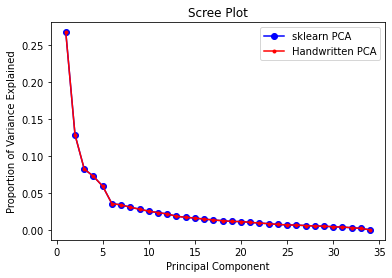

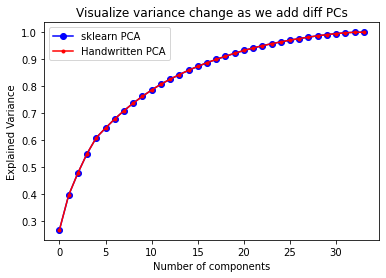

In [22]:
PC_values_handwritten = np.arange(sorted_variance_contributions.shape[0]) + 1
PC_values_sklearn = np.arange(pca.n_components_) + 1
plt.title('Scree Plot')
plt.plot(PC_values_sklearn, pca.explained_variance_ratio_, 'bo-', label='sklearn PCA')
plt.plot(PC_values_handwritten, sorted_variance_contributions[:], 'r.-', label='Handwritten PCA')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.legend()
plt.show()

plt.title('Visualize variance change as we add diff PCs')
plt.ylabel('Explained Variance')
plt.xlabel('Number of components')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-', label='sklearn PCA')
plt.plot(np.cumsum(sorted_variance_contributions), 'r.-', label='Handwritten PCA')
plt.legend()
plt.show()

## We find perfect match between our handwritten PCA and sklearn predicted results.

# 4. DISTANCES AND SIMILARITIES

## a. Mahalanobis Distance

### We choose 5 most relevant features from the first exercise for this.
### These are columns: 3, 14,  4, 5, 10

In [23]:
def mahalanobis_distance(u, v, invcovmat):
    # u, v must be 1-D vectors like in the Scipy implementation
    invcovmat = np.atleast_2d(invcovmat)
    delta = u - v
    m_tmp = np.dot(delta, invcovmat)
    m = np.dot(m_tmp, delta)
    return np.sqrt(m)

In [24]:
md_matrix_len = leaf_data.shape[0]
md_matrix = np.zeros((md_matrix_len,md_matrix_len))
md_scipy = np.zeros_like(md_matrix)

leaf_data_relevant = leaf_data[:,(3,14,4,5,10)]
invcovmat = np.linalg.inv(np.cov(leaf_data_relevant.T))

for i in range(md_matrix_len):
    for j in range(i + 1, md_matrix_len):
        md_matrix[i,j] = md_matrix[j,i] \
        = mahalanobis_distance(leaf_data_relevant[i,:],leaf_data_relevant[j,:],invcovmat)
        md_scipy[i,j] = md_scipy[j,i] \
        = distance.mahalanobis(leaf_data_relevant[i,:],leaf_data_relevant[j,:],invcovmat)
        
#print(md_matrix.shape)
#print(md_matrix[:,0])
#print(md_scipy[:,0])

diff_md = md_matrix - md_scipy
#print(diff_md.shape)
#print(diff_md)

if np.isclose(diff_md,0).any():        
    print("\nScipy and my implementation give same result")


Scipy and my implementation give same result


### We find perfect match between our handwritten Mahalanobis Distance and Scipy calculated results.

## b. Euclidean Distance - PCA space

In [25]:
ion_data_pca = np.loadtxt('../Data_USL/ionosphere.data', delimiter=',', usecols=pca_list)

In [26]:
def euclidean_distance(u, v):
    dist = np.sqrt(((u - v)**2).sum(axis=0))
    return dist

In [27]:
ed_matrix_len = ion_data_pca.shape[0]
ed_matrix = np.zeros((ed_matrix_len,ed_matrix_len))
ed_scipy = np.zeros_like(ed_matrix)

for i in range(ed_matrix_len):
    for j in range(i + 1, ed_matrix_len):
        ed_matrix[i,j] = ed_matrix[j,i] \
        = euclidean_distance(ion_data_pca[i,:],ion_data_pca[j,:])
        ed_scipy[i,j] = ed_scipy[j,i] \
        = distance.minkowski(ion_data_pca[i,:],ion_data_pca[j,:])
        
#print(ed_matrix.shape)
#print(ed_matrix[:,0])
#print(ed_scipy[:,0])

diff_ed = ed_matrix - ed_scipy
#print(diff_ed.shape)
#print(diff_ed)

if np.isclose(diff_ed,0).any():        
    print("\nScipy and my implementation give same result")


Scipy and my implementation give same result


### We find perfect match between our handwritten Euclidean Distance and Scipy calculated results.

# c. Hamming Distance

In [28]:
def hamming_distance(u, v):
    u_ne_v = u != v
    return np.average(u_ne_v)

In [29]:
cv_df_mod_dropna = cv_df_mod.dropna()

hd_matrix_len = cv_df_mod_dropna.shape[0]-1
hd_matrix = np.zeros((hd_matrix_len,hd_matrix_len))
hd_scipy = np.zeros_like(hd_matrix)

for i in range(1,hd_matrix_len-1):
    for j in range(i + 1, hd_matrix_len-1):
        hd_matrix[i,j] = hd_matrix[j,i] \
        = hamming_distance(cv_df_mod_dropna.iloc[i],cv_df_mod_dropna.iloc[j])
        hd_scipy[i,j] = hd_scipy[j,i] \
        = distance.hamming(cv_df_mod_dropna.iloc[i],cv_df_mod_dropna.iloc[j])


#print(hd_matrix.shape)
#print(hd_matrix[:,1])
#print(hd_scipy[:,1])

diff_hd = hd_matrix - hd_scipy
#print(diff_hd)

if np.isclose(diff_hd,0).any():        
    print("\nScipy and my implementation give same result")


Scipy and my implementation give same result


### We find perfect match between our handwritten Hamming Distance and Scipy calculated results.